In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [4]:
df = pd.read_csv("all_data.csv")
pd.set_option('display.max_rows', 1000)

textures = df['Texture'].unique()
conditions = df['Condition'].unique()

df_graph = pd.DataFrame({'Scale values': [1,2,3,4,5,6,7]})

for texture in textures:
    for condition in conditions:
        #print(texture, condition)
        
        # Get number of times each rating scale value appears for this iteration's condition and texture
        df_i = df[(df['Condition'] == condition) & (df['Texture'] == texture)]
        df_counts = pd.DataFrame(df_i['Ratings'].value_counts()).sort_values(by=['Ratings']).reindex(range(1, 8), fill_value=0)
        
        # Append to graph dataframe
        df_graph[f'{condition} {texture}'] = df_counts.values


print(df_graph)

   Scale values  0 Carpet  1 Carpet  0 Wood  1 Wood  0 RoughFoam  1 RoughFoam  \
0             1         8         0       3       1           13            4   
1             2         6        17      16       8           12           13   
2             3        21        19      15      23           10           15   
3             4        13        14       6       7            7            1   
4             5         9         7      16      10           12           16   
5             6         3         3       4      11            6           10   
6             7         0         0       0       0            0            1   

   0 Sandpaper  1 Sandpaper  
0            0            1  
1            6            3  
2           12            9  
3           16           17  
4           17           16  
5            7           12  
6            2            2  


C:\Users\User\AppData\Local\Temp\ipykernel_365660\2005583617.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(['No visual', 'Visual'])
C:\Users\User\AppData\Local\Temp\ipykernel_365660\2005583617.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(['No visual', 'Visual'])
C:\Users\User\AppData\Local\Temp\ipykernel_365660\2005583617.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(['No visual', 'Visual'])
C:\Users\User\AppData\Local\Temp\ipykernel_365660\2005583617.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(['No visual', 'Visual'])


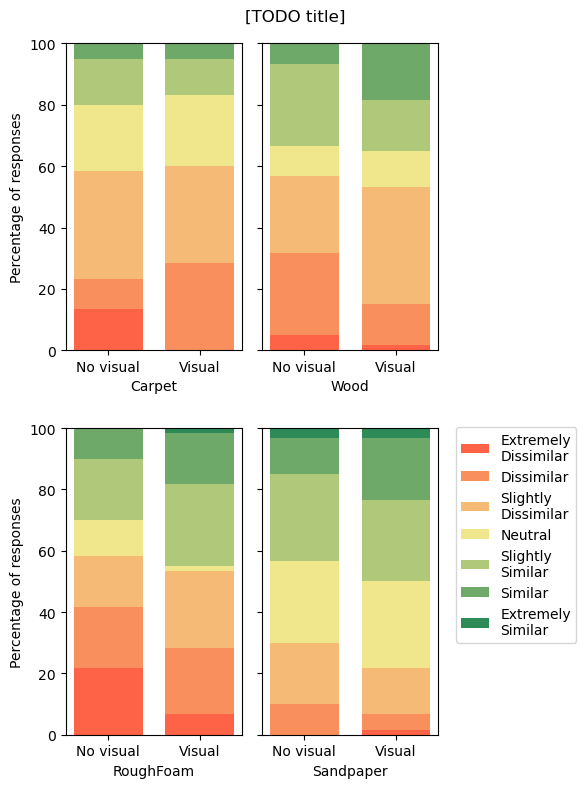

In [6]:
# Generate plot
fig, ax = plt.subplots(2,2,figsize=(6,8), sharey=True)

locs = [(0,0), (0,1), (1,0), (1,1)]
ratings = df_graph[df_graph.columns[0]].tolist()
texture_condition_pairs = df_graph.columns[1:].tolist()
cmap = mcolors.LinearSegmentedColormap.from_list('CustomMap', ['tomato', 'khaki', 'seagreen'], N=7)(np.linspace(0, 1, 7))
likert_labels = ["Extremely\nDissimilar", 
                 "Dissimilar", 
                 "Slightly\nDissimilar", 
                 "Neutral", 
                 "Slightly\nSimilar", 
                 "Similar", 
                 "Extremely\nSimilar"]

# Create subplot per texture
for i, texture in enumerate(textures):
    bottom = 0
    plot = ax[locs[i]]
    for rating in ratings:
        texture_cols = [col for col in df_graph.columns if texture in col]
        values = df_graph.loc[df_graph['Scale values'] == rating][texture_cols].values.flatten().tolist()
        percentages = np.array([v / 60 * 100 for v in values])

        p = plot.bar(texture_cols, percentages, bottom=bottom, width=0.75, color=cmap[rating-1], label = likert_labels[rating-1])
        bottom+=percentages
    plot.set_xticklabels(['No visual', 'Visual'])
    plot.set_yticks(np.arange(0, 101, 20))
    if locs[i][1] == 0: plot.set_ylabel('Percentage of responses')
    plot.set_xlabel(texture)

plot.legend(loc=(1.1, 0.3))

fig.suptitle('[TODO title]') 
plt.tight_layout()
plt.show()